In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
fits_filename = ('/Users/orion/phd_research/3C297/3c297-no_bkgd_sub/3c297_Hband_1_COADD_OBJ.fits')  
hdul = fits.open(fits_filename)
hdul.info()
data_cube = hdul[0].data
cube_header = hdul[0].header

print (np.shape(data_cube))

Filename: /Users/orion/phd_research/3C297/3c297-no_bkgd_sub/3c297_Hband_1_COADD_OBJ.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     779   (66, 68, 2210)   float32   
(2210, 68, 66)


In [3]:
cw = cube_header['CRVAL3']         # central wavelength
mp = cube_header['CDELT3']         # microns per pixel

print (cw,mp)

y = data_cube[:,32,30]
x = np.arange(len(y))
#print (np.shape(x), np.shape(y))

start_w = cw - cube_header['CRPIX3']*mp 
x = start_w + x*mp

x    

1.64999997615814 0.000195000000530854


array([1.43452498, 1.43471998, 1.43491498, ..., 1.86488998, 1.86508498,
       1.86527998])

In [4]:
y[np.isnan(y)] = 1e-15
y[y>5000] = 1e-15
y[y<-500] = 1e-15

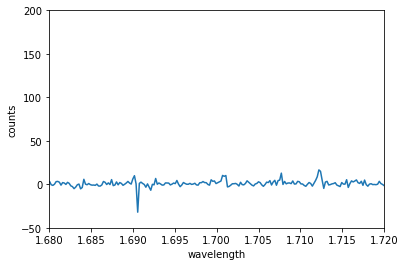

In [5]:
plt.plot(x,y) 
plt.xlim([1.68,1.72])            
plt.ylim([-50,200])
plt.xlabel('wavelength')
plt.ylabel('counts')     
plt.show()

In [17]:
wave = x

select1 = (wave>1.70) & (wave<1.73)
small_wave1 = wave[select1]
small_spec1 = y[select1]
small_spec1[np.isnan(small_spec1)] = 1e-15
small_spec1[small_spec1<-10] = 1e-15

select2 = (wave>1.77) & (wave<1.80)
small_wave2 = wave[select2]
small_spec2 = y[select2]
small_spec2[np.isnan(small_spec2)] = 1e-15
small_spec2[small_spec2<-10] = 1e-15

select3 = (wave>1.51) & (wave<1.53)
small_wave3 = wave[select3]
small_spec3 = y[select3]
small_spec3[np.isnan(small_spec3)] = 1e-15
small_spec3[small_spec3<-10] = 1e-15

In [18]:
def redshift(vel):
    return vel/300000.0

# This function includes both the line dispersion through velocity dispersion in km/s and the instrument based 
# dispersion - since the spectrograph itself broadens the emission lines (due to INSTRUMENT PSF). This way we 
# automatically fit for the INTRINSIC line dispersion as well

def line_width(vel_sigma,rest_line,inst_res_fwhm=0.0): 
    sigma = vel_sigma/(300000.0-vel_sigma)*rest_line
    return np.sqrt(sigma**2+(inst_res_fwhm/2.354)**2) 


In [19]:
def gauss(wave_range,amplitude,vel,vel_sigma, rest_w):
    line = (amplitude)*exp(-(wave_range-(rest_w*(1+redshift(vel))))**2/(2*(line_width(vel_sigma, rest_w))**2))
    return line

def OH_gauss1(wave_range,amp_OH,vel,vel_sigma,m,c):
    OH = gauss(wave_range,amp_OH,vel,vel_sigma,1.7120)
    cont = (wave_range/1000.0)*m+c
    return OH + cont

def OH_gauss2(wave_range,amp_OH,vel,vel_sigma,m,c):
    OH = gauss(wave_range,amp_OH,vel,vel_sigma,1.7878)
    cont = (wave_range/1000.0)*m+c
    return OH + cont

def OH_gauss3(wave_range,amp_OH,vel,vel_sigma,m,c):
    OH = gauss(wave_range,amp_OH,vel,vel_sigma,1.5239)
    cont = (wave_range/1000.0)*m+c
    return OH + cont

[ 1.65184435e+01  4.50934328e+01  3.34662688e+01 -1.86107769e+04
  3.33051320e+01]


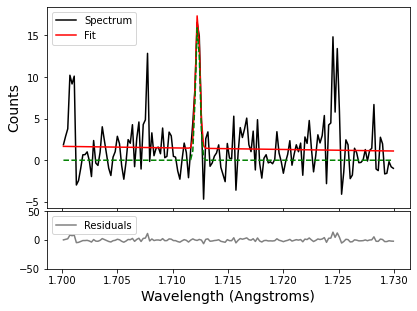

[ 8.55342171e+00 -5.60448894e+01  4.24642176e+01  8.88812677e+03
 -1.49756431e+01]


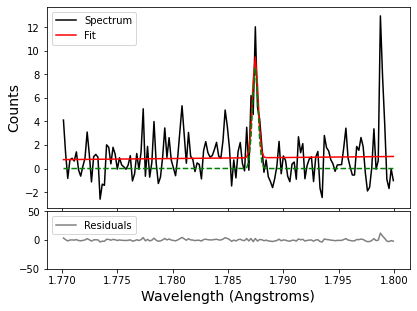

[ 5.48416052e+01 -3.78570833e+00  2.11295797e+01 -1.16259111e+05
  1.77851404e+02]


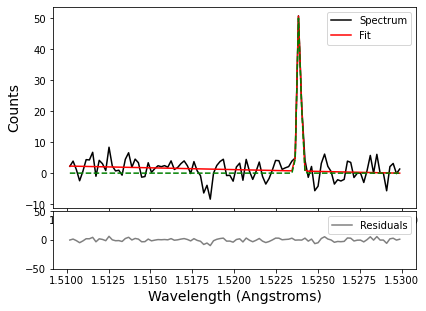

In [20]:
from scipy.optimize import curve_fit
from numpy import asarray as ar,exp

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.27, 0.84, 0.7]) 
ax2 = fig.add_axes([0.1, 0.06, 0.84, 0.2])


popt_OH_fit1,pcov_OH_fit1 = curve_fit(OH_gauss1,small_wave1,small_spec1,p0=[20, 0, 50, 0, 10],maxfev = 100000)                                                    
print (popt_OH_fit1)

yfit1 = OH_gauss1(small_wave1,*popt_OH_fit1)

(amp_OH,vel,vel_sigma,m,c) = popt_OH_fit1    

ax1.plot(small_wave1,small_spec1, 'k-', label='Spectrum')
ax1.plot(small_wave1,yfit1,'r-',label='Fit')
ax1.plot(small_wave1, gauss(small_wave1,amp_OH,vel,vel_sigma,1.7120), 'g-', linestyle='--')
residuals1 = small_spec1 - yfit1
ax2.plot(small_wave1, residuals1, 'gray', label='Residuals')
ax2.set_ylim(-50,50)
ax1.set_ylabel('Counts', {'fontsize': 14})
ax2.set_xlabel('Wavelength (Angstroms)', {'fontsize': 14})
ax1.legend()
ax2.legend()
plt.show()


fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.27, 0.84, 0.7]) 
ax2 = fig.add_axes([0.1, 0.06, 0.84, 0.2])


popt_OH_fit2,pcov_OH_fit2 = curve_fit(OH_gauss2,small_wave2,small_spec2,p0=[20, 0, 50, 0, 10],maxfev = 100000)                                                    
print (popt_OH_fit2)

yfit2 = OH_gauss2(small_wave2,*popt_OH_fit2)

(amp_OH,vel,vel_sigma,m,c) = popt_OH_fit2   

ax1.plot(small_wave2,small_spec2, 'k-', label='Spectrum')
ax1.plot(small_wave2,yfit2,'r-',label='Fit')
ax1.plot(small_wave2, gauss(small_wave2,amp_OH,vel,vel_sigma,1.7878), 'g-', linestyle='--')
residuals2 = small_spec2 - yfit2
ax2.plot(small_wave2, residuals2, 'gray', label='Residuals')
ax2.set_ylim(-50,50)
ax1.set_ylabel('Counts', {'fontsize': 14})
ax2.set_xlabel('Wavelength (Angstroms)', {'fontsize': 14})
ax1.legend()
ax2.legend()
plt.show()


fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.27, 0.84, 0.7]) 
ax2 = fig.add_axes([0.1, 0.06, 0.84, 0.2])

popt_OH_fit3,pcov_OH_fit3 = curve_fit(OH_gauss3,small_wave3,small_spec3,p0=[20, 0, 50, 0, 10],maxfev = 100000)                                                    
print (popt_OH_fit3)

yfit3 = OH_gauss3(small_wave3,*popt_OH_fit3)

(amp_OH,vel,vel_sigma,m,c) = popt_OH_fit3   

ax1.plot(small_wave3,small_spec3, 'k-', label='Spectrum')
ax1.plot(small_wave3,yfit3,'r-',label='Fit')
ax1.plot(small_wave3, gauss(small_wave3,amp_OH,vel,vel_sigma,1.5239), 'g-', linestyle='--')
residuals3 = small_spec3 - yfit3
ax2.plot(small_wave3, residuals3, 'gray', label='Residuals')
ax2.set_ylim(-50,50)
ax1.set_ylabel('Counts', {'fontsize': 14})
ax2.set_xlabel('Wavelength (Angstroms)', {'fontsize': 14})
ax1.legend()
ax2.legend()
plt.show()